In [1]:
import ads
import numpy as np
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
from astropy.time import Time

In [2]:
faculty_lists = dict()

In [16]:
#List of Astro faculty
faculty_lists['UCH'] = [
    'Blanc, G',
    'Bronfman, L',
    'Campusano, L',
    'Casassus, S',
    'Costa, E',
    'Escala, A',
    'Finger, R',
    'Forster, F.',
    'Lira, P',
    'Lopez, S',
    'Mardones, D',
    'Max Moerbeck, W', 
    'Maza, J',
    'Mendez, R', 
    'Munoz, R',
    'Perez, L', 
    'Rojo, P', 
    'Rubio, M',
    'Ruiz, M'
]

In [4]:
faculty_lists['UDP'] = [
    "Aravena, M",
    "Assef, R",
    "Cieza, L",
    "Jenkins, J",
    "Johnston, E",
    "Jofre, P",
    "Mazzucchelli, C",
    "Prieto, J",
    "Ricci, C",
    "Yang, B",
    "Zurlo, A"
]

In [5]:
faculty_lists['PUC'] = [
    'Aguilera Gomez, C',
    'Barrientos, L', 
    'Bauer, F', 
    'Catelan, M',
    'Chaname, J', 
    'Clocchiatti, A',
    'Dunner, R',
    'Galaz, G',
    'Guzman, V',
    'Petrovich, C',
    'Puzia, T',
    'Tissera, P',
    'Treister, E',
    'Zoccali, M'
]

In [18]:
faculty_lists['UNAB'] = [
    'Anguita, T', 
    'Caceres, C', 
    'Chemin, L',
    'Gavignaud, I',
    'Gomez Camus, M', 
    'Guaita, L',
    'Masetti, N', 
    'Minniti, D', 
    'Monaco, L', 
    'Nantais, J',
    'Ohnaka, K',
]

In [28]:
#https://fisica.usm.cl/departamento/academicos-y-docentes/
faculty_lists['UTSM'] = [
    'Jaffe, Y', 
    'Montero Dorta, A',
    'Schreiber, M',
    'Smith, R', 
    'Toloza, O',
]

In [37]:
faculty_lists["UAI"] = [
    'Benitez Llambay, P', 
    'Brahm, R', 
    'Cuadra, J',
    'Jordan, A', 
    'Mulders, G', 
    'Munoz, D', 
]

In [7]:
#Search for all papers from UDP in ADS in a given year.
def paper_search(year, affs="portales"):
    q = ads.SearchQuery(aff=affs, year=year, fl=["author", "citation_count", "aff", "property", "doctype", "title", "pubdate"], max_pages=100)
    ql = list(q)
    return ql

In [8]:
def proc_name(input_name):
    name = unidecode(input_name)
    name = re.sub("-"," ", name)
    name = re.sub("^(.*?\, .).*$",r"\1", name)
    return name

In [9]:
#Distribute publications between UDP authors.
def get_n_papers(ads_query_list, faculty, only_faculty=False, affs=["portales"]):
    n_papers = dict()
    for paper in ads_query_list:

        #Only process refereed articles.
        if 'REFEREED' in paper.property and paper.doctype=='article':
            pass
        else:
            continue

        inst_auth = list()
        for k in range(len(paper.author)):
            name = proc_name(paper.author[k])
            if len(faculty)==0 or name in faculty:
                found_aff = True
                for aff in affs:
                    if not re.search(aff, unidecode(paper.aff[k]), flags=re.IGNORECASE):
                        found_aff = False
                if found_aff:
                    inst_auth.append(name)
        for name in inst_auth:
            if name in n_papers:
                n_papers[name] += 1./len(inst_auth)
            else:
                n_papers[name] = 1./len(inst_auth)
    return n_papers

In [10]:
ql = dict()
aff_search = dict()
n_papers = dict()

In [35]:
aff_search["UCH"] = "Universidad de Chile"
aff_search["UDP"] = "portales"
aff_search["PUC"] = "Pontificia Universidad Catolica de Chile"
aff_search["UNAB"] = "Universidad Andres Bello"
aff_search["UTSM"] = "Universidad Tecnica Federico Santa Maria"
aff_search["UAI"] = "Universidad Adolfo Ibanez"

In [33]:
for key in aff_search.keys():
    if key not in ql:
        ql[key] = paper_search(2023, affs=[aff_search[key]])

In [40]:
# inst = "UAI"
# ql[inst] = paper_search(2023, affs=[aff_search[inst]])
# n_papers[inst] = get_n_papers(ql[key], faculty_lists[inst], only_faculty=True, affs=[aff_search[inst]])
# np.unique(list(n_papers[inst].keys()))

In [38]:
#Sort dividing papers as they go for incentivos.
for key in ql.keys():
    n_papers[key] = get_n_papers(ql[key], faculty_lists[key], only_faculty=True, affs=[aff_search[key]])

Text(0, 0.5, 'Numero de articulos')

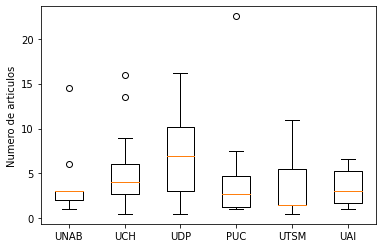

In [39]:
list_for_plots = list()
keys = list(n_papers.keys())
for key in keys:
    list_for_plots.append(list(n_papers[key].values()))
plt.boxplot(list_for_plots, labels=keys)
plt.ylabel("Numero de articulos")